In [1]:
import numpy as np
import scipy
from scipy.fft import fft2, ifft2
import matplotlib.pyplot as plt

In [2]:
# Initialize x-y mesh
x = np.linspace(-10, 10, 64, endpoint=False)
y = np.linspace(-10, 10, 64, endpoint=False)
X, Y = np.meshgrid(x, y)

# Define initial conditions
m = 1
alpha = 0
n = 64
u = (np.tanh(np.sqrt(X**2 + Y**2)) - alpha)*np.cos(m*np.angle(X + 1j*Y) - np.sqrt(X**2 + Y**2))
v = (np.tanh(np.sqrt(X**2 + Y**2)) - alpha)*np.sin(m*np.angle(X + 1j*Y) - np.sqrt(X**2 + Y**2))
A1 = X
A2 = u

# Transform into Fourier domain
u0 = fft2(u)
v0 = fft2(v)
A3 = u0.real

vec0_new = np.hstack([(u0.reshape(n*n), v0.reshape(n*n))])

# Append initial conditions
u0 = u0.reshape(-1, 1, order='F')
v0 = v0.reshape(-1, 1, order='F')
vec0 = np.concatenate((u0, v0))
A4 = vec0.imag

def rhs1(t, n, vec, beta, KX, KY):
    """Right-hand side function to return Fourier transform of the solution"""
    u_hat = vec[:4096].reshape(n, n, order='F')
    v_hat = vec[4096:].reshape(n, n, order='F')

    # Transform out of Fourier domain
    u = ifft2(u_hat)
    v = ifft2(v_hat)

    u_nl = u - u**3 - u*v**2 + beta*(v*u**2 + v**3)
    v_nl = -beta*(u**3 + u*v**2) + v - v*u**2 - v**3

    u_t = fft2(u_nl) - 0.1*((KX**2)*u_hat + (KY**2)*u_hat)
    v_t = fft2(v_nl) - 0.1*((KX**2)*v_hat + (KY**2)*v_hat)

    u_t = u_t.reshape(n**2, order='F')
    v_t = v_t.reshape(n**2, order='F')
    rhs = np.concatenate((u_t, v_t), axis=0)

    return rhs

In [3]:
X

array([[-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       ...,
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875],
       [-10.    ,  -9.6875,  -9.375 , ...,   9.0625,   9.375 ,   9.6875]])

In [4]:
t_span = np.linspace(0, 4, 9)
t_span

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [5]:
np.squeeze(vec0).shape

(8192,)

In [6]:
vec0_new.shape

(2, 4096)

In [7]:
t_span = np.linspace(0, 4, 9)
r1 = np.arange(0, n/2, 1)
r2 = np.arange(-n/2, 0, 1)
kx = (2*np.pi/20)*np.concatenate((r1, r2))
ky = kx.copy()
KX, KY = np.meshgrid(kx, ky)
beta = 1

# Timestep using the explicit Runge-Kutta method of order 4(5)
sol1 = scipy.integrate.solve_ivp(lambda t, vec: rhs1(t, n, vec, beta, KX, KY), [0, 4], np.squeeze(vec0), t_eval = t_span)
A5 = sol1.y.real
A6 = sol1.y.imag
A7 = sol1.y.real[:4096][:, 4].reshape(-1, 1)
A8 = sol1.y.real[:4096][:, 4].reshape(n, n, order='F')
A9 = ifft2(sol1.y[:4096][:, 4].reshape(n, n, order='F')).real
A9

array([[ 0.04736064,  0.28133149,  0.40533858, ..., -0.39682142,
        -0.3207424 , -0.16293972],
       [-0.35052829, -0.04875761,  0.12279245, ..., -0.72544528,
        -0.70229182, -0.59007818],
       [-0.55427268, -0.2701817 , -0.10639557, ..., -0.8698788 ,
        -0.86781795, -0.77714496],
       ...,
       [ 0.86154337,  0.92296386,  0.9143369 , ...,  0.47410608,
         0.55025144,  0.71735188],
       [ 0.77718833,  0.85307907,  0.85788894, ...,  0.28891867,
         0.40292024,  0.6114546 ],
       [ 0.51541845,  0.63887318,  0.68372814, ..., -0.00172152,
         0.12407574,  0.33709663]])

In [8]:
sol1.y

array([[ 24.94003847+0.00000000e+00j,  12.73268299-1.11053201e-15j,
         -1.38095598-2.32314163e-16j, ..., -64.02389647-1.46100786e-14j,
        -67.76356741-1.56109324e-14j, -61.18058974-1.99476748e-14j],
       [  0.99295252-1.42103578e+01j,  12.02949309-4.37375205e+01j,
         24.70184895-7.06089959e+01j, ...,  29.22746661-3.10063992e+01j,
          8.40670057+1.79896533e+01j, -18.5268817 +6.94221535e+01j],
       [ 32.80550386+1.70907884e+02j,  39.16999947+1.59554619e+02j,
         38.79066457+1.20157720e+02j, ..., -43.73006064-1.03164328e+02j,
        -63.43595573-1.29222009e+02j, -70.7356071 -1.32182907e+02j],
       ...,
       [-22.22413001-6.17577477e+02j, -15.02139101-6.49103907e+02j,
         -3.38551438-5.64160667e+02j, ...,  42.60088811+4.49555077e+02j,
         30.98002141+6.28860801e+02j,   8.04758007+6.88983996e+02j],
       [ -8.98445504-1.07662293e+02j,  -4.82476629-3.17538939e+02j,
         -0.75921268-4.66053832e+02j, ...,  32.2969229 -7.36519513e+01j,
       

(64, 64)


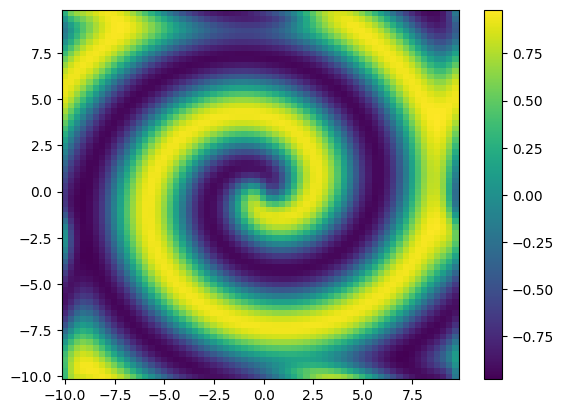

In [10]:
[X,Y]=np.meshgrid(x,y)
#tspan[8] =25
z = np.real(ifft2(sol1.y[0:4096,8].reshape(64,64)))
print(np.shape(z))

# Generate the plot
fig, ax = plt.subplots()
cmap = ax.pcolor(X, Y, z.T)
fig.colorbar(cmap)
plt.show(fig)

# Problem 2

In [56]:
# Define Cheb
def cheb(N):
    if N == 0:
        D = 0.
        x = 1.
    else:
        n = np.arange(0, N+1)
        x = np.cos(np.pi*n/N).reshape(N+1, 1)
        c = (np.hstack(([2.], np.ones(N-1), [2.])) * (-1)**n).reshape(N+1, 1)
        X = np.tile(x, (1, N+1))
        dX = X - X.T
        D = np.dot(c, 1./c.T) / (dX + np.eye(N+1))
        D -= np.diag(np.sum(D.T, axis=0))  # Changed sum() to np.sum()
    
    return D, x.reshape(N+1)

In [70]:
# Define initial conditions
m = 1
alpha = 0
n = 30
N2 = (n+1)*(n+1)
# Create the Chebyshev differentiation matrix
D, x = cheb(n)

D[n,:]=0
D[0,:]=0

D2 = (np.dot(D, D))/((10)*(10))
y = x

# Scale Laplacian
I = np.eye(len(D2))
Lap = np.kron(D2, I) + np.kron(I, D2)


# Create the Chebyshev points
X, Y = np.meshgrid(x,y)
X = X*(20/2)
Y = Y*(20/2)

In [71]:
u = (np.tanh(np.sqrt(X**2 + Y**2)) - alpha)*np.cos(m*np.angle(X + 1j*Y) - np.sqrt(X**2 + Y**2))
v = (np.tanh(np.sqrt(X**2 + Y**2)) - alpha)*np.sin(m*np.angle(X + 1j*Y) - np.sqrt(X**2 + Y**2))

# Append initial conditions
u1 = u.flatten()
v1 = v.flatten()
vec1 = np.concatenate([u1, v1])

def rhs2(t, vec, beta,N, Lap):
    """"Right-hand side function to solve our PDE"""
    u = vec[:N]
    v = vec[N:2*N]

    u_nl = u - u**3 - u*v**2 + beta*(v*u**2 + v**3)
    v_nl = -beta*(u**3 + u*v**2) + v - v*u**2 - v**3

    u_t = u_nl + 0.1*(Lap@u)
    v_t = v_nl + 0.1*(Lap@v)

    rhs = np.concatenate((u_t, v_t), axis=0)

    return rhs



In [73]:
# Timestep using the explicit Runge-Kutta method of order 4(5)
sol2 = scipy.integrate.solve_ivp(lambda t, vec: rhs2(t, vec, beta,N2, Lap), [0, 4], np.squeeze(vec1), t_eval = t_span)
sol2.y

array([[ 0.70358468,  0.27678435, -0.21775865, ..., -0.79689015,
        -0.40972859,  0.07776933],
       [ 0.73241275,  0.47188952,  0.07344742, ..., -0.96577657,
        -0.78500366, -0.4261521 ],
       [ 0.81058026,  0.37605887, -0.11123233, ..., -0.84008598,
        -0.49565779, -0.03085913],
       ...,
       [ 0.58562756,  0.91352592,  0.97914313, ..., -0.50294695,
        -0.84298442, -0.97634716],
       [ 0.6808609 ,  0.87018536,  0.97997159, ..., -0.16453512,
        -0.5878894 , -0.88455009],
       [ 0.71061143,  0.96093661,  0.97601586, ..., -0.60413504,
        -0.91222169, -0.99697897]])